In [1]:
# ДЗ 
# 1. Для изображения sar_3.jpg найти наиболее протяженный участок
# (выделить линии при помощи преобразования Хафа)
# 2. Для изображения sar_3.jpg провести исследование алгоритмов бинаризации, выделить участок дорожной полосы.

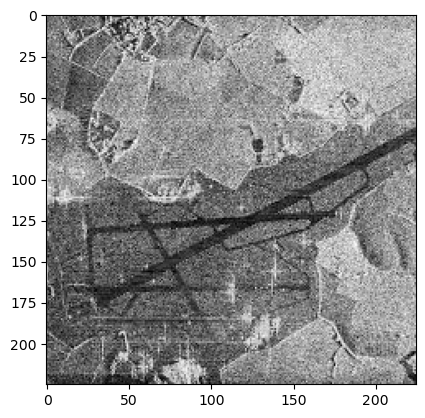

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('sar_3.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

plt.imshow(image_gray, cmap="gray")

# 2. Для изображения sar_3.jpg провести исследование алгоритмов бинаризации, выделить участок дорожной полосы.

# Точечная бинаризация

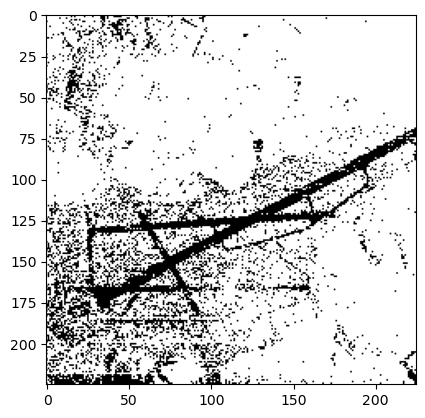

In [9]:
import copy

bin_img = copy.deepcopy(image_gray)
T = 80
bin_img[image_gray < T] = 0
bin_img[image_gray >= T] = 255

plt.imshow(bin_img, cmap="gray")

# Бинаризация Отсу

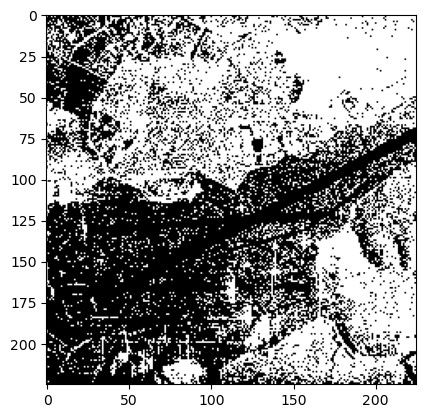

In [10]:
_,th2 = cv2.threshold(image_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(th2, cmap="gray")

# Адаптивная бинаризация

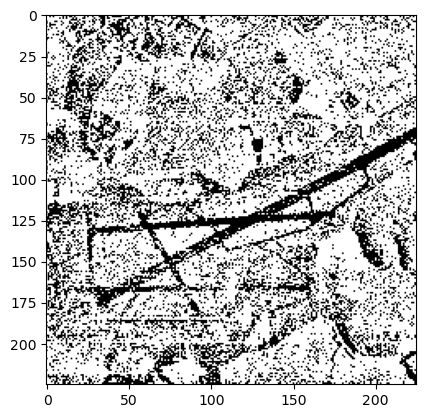

In [11]:
th3 = cv2.adaptiveThreshold(image_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,71,21)
plt.imshow(th3, cmap="gray")

# Оператор Собеля

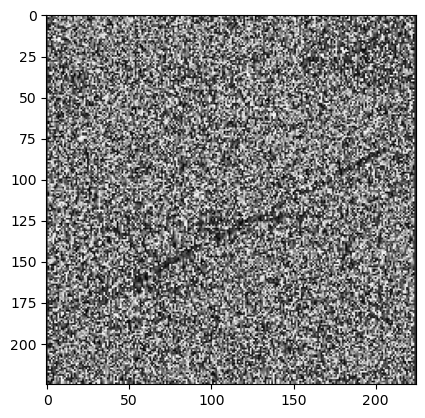

In [12]:
scale = 1
delta = 0
ddepth = cv2.CV_16S
grad_x = cv2.Sobel(image_gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
grad_y = cv2.Sobel(image_gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
plt.imshow((grad_x - grad_x.min())*255, cmap="gray")

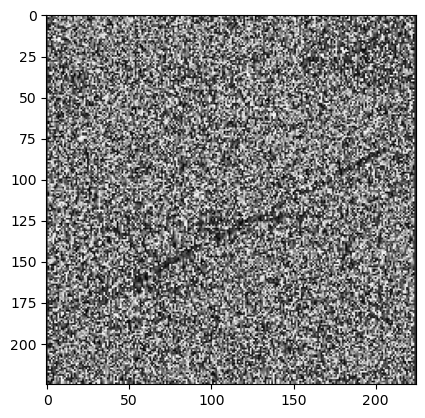

In [13]:
plt.imshow((grad_x - grad_x.min())*255, cmap="gray")

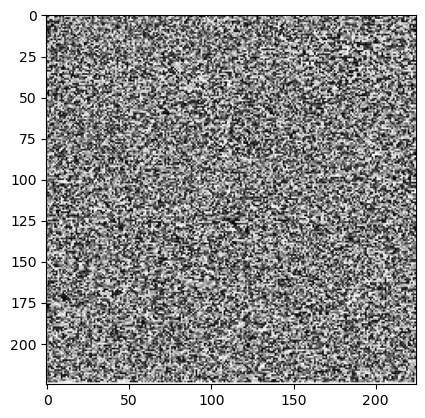

In [14]:
plt.imshow((grad_y - grad_y.min())*255, cmap="gray")

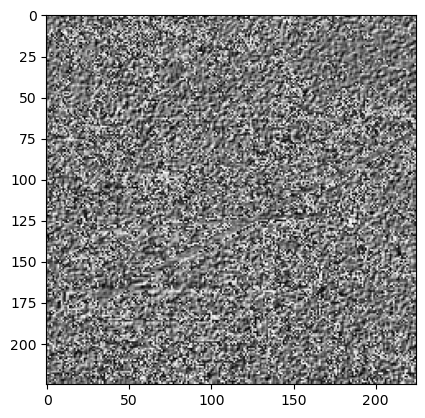

In [15]:
grad = cv2.addWeighted(grad_x, 0.5, grad_y, 0.5,0.0)
plt.imshow((grad - grad.min())*255, cmap="gray")

# Canny

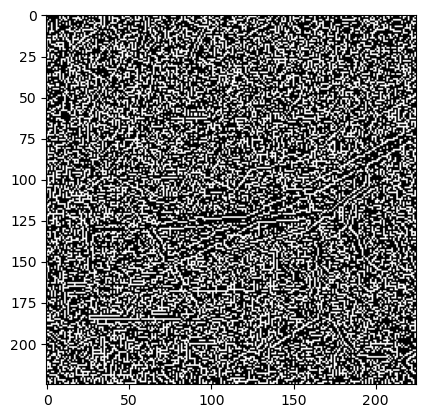

In [21]:
edges = cv2.Canny(image_gray,0,50)
plt.imshow(edges, cmap="gray")

# 1. Для изображения sar_3.jpg найти наиболее протяженный участок (выделить линии при помощи преобразования Хафа)

# Преобразование Хафа

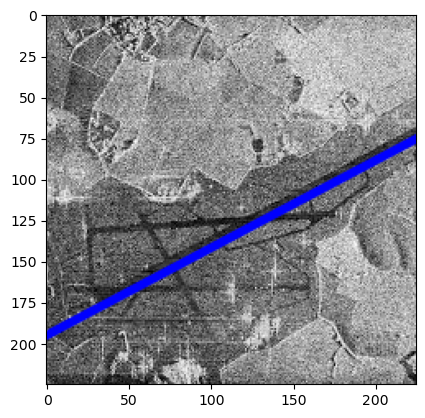

In [87]:
import math 

image = cv2.imread('sar_3.jpg')
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) 
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

canny = cv2.Canny(bin_img,0,250,apertureSize = 3)
lines = cv2.HoughLines(canny, 1, np.pi / 180, 110)
if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv2.line(image, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)
plt.imshow(image)